# Qiskit from Scratch
## Austin Python Meetup
### Tuesday, April 16, 2019

## Installation & Set Up
Only needs doing once

### install packages

In [1]:
#%pip install qiskit-aqua qiskit

### obtain API token

https://quantumexperience.ng.bluemix.net/qx/account/advanced

### save API token 

In [2]:
# from qiskit import IBMQ
# IBMQ.save_account('78a3b...') # the token you obtaine above

## First circuit

We will build a circuit to prepare the Bell state
, the "Hello World" of quantum computing.
It is the simplest demonstration combining the 2 core quantum phenamena: superposition & entanglement
quantum programs == quantum circuits (unless doing quantum annealing ie D-Wave)

In [3]:
%matplotlib inline
import qiskit as qk

### Allocate a circuit with 2 qubits and 2 classical bits.

In [4]:
qr = qk.QuantumRegister(2)
cr = qk.ClassicalRegister(2)
qc = qk.QuantumCircuit(qr,cr)

### Add Hadamard gate to put first qubit in superposition

In [5]:
qc.h(qr[0])

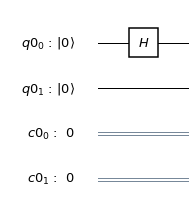

In [6]:
qc.draw(output='mpl')

### Add Contolled-Not gate to entangle qubits

In [7]:
qc.cx(qr[0], qr[1])

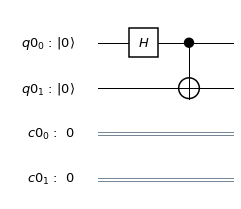

In [8]:
qc.draw(output='mpl')

### Add measurerement of both qubits

In [9]:
qc.measure(qr,cr)

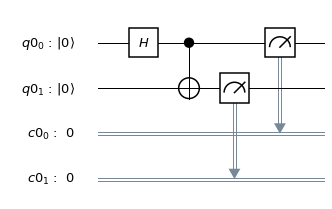

In [10]:
qc.draw(output='mpl')

### Simulate circuit classically

In [11]:
qk.Aer.backends()

[<QasmSimulator('qasm_simulator') from AerProvider()>,
 <StatevectorSimulator('statevector_simulator') from AerProvider()>,
 <UnitarySimulator('unitary_simulator') from AerProvider()>]

In [12]:
sim = qk.Aer.get_backend('qasm_simulator')

In [13]:
res = qk.execute(qc, sim).result()

In [14]:
qk.tools.visualization.iplot_histogram(res.get_counts())

### Run circuit on real quantum computer

In [15]:
qk.IBMQ.load_accounts()
procs = qk.IBMQ.backends()
procs

[<IBMQBackend('ibmqx4') from IBMQ()>,
 <IBMQBackend('ibmqx2') from IBMQ()>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ()>,
 <IBMQBackend('ibmq_qasm_simulator') from IBMQ()>]

In [16]:
from qiskit.tools import monitor
job = qk.execute(qc, backend=qk.providers.ibmq.least_busy(qk.IBMQ.backends()), shots=2**10)
mon = monitor.job_monitor(job)
res2 = job.result()

HTML(value="<p style='font-size:16px;'>Job Status: job is being initialized </p>")

In [17]:
qk.tools.visualization.iplot_histogram(res2.get_counts(qc))

## What next?

### Repos
- https://github.com/Qiskit
  - https://github.com/Qiskit/qiskit-tutorials
  - https://github.com/Qiskit/qiskit-presentations
- https://github.com/jaygambetta
- https://github.com/JavaFXpert
- https://github.com/decodoku
- https://github.com/xanaduai
- https://github.com/artix41/awesome-quantum-ml
- https://github.com/desireevl/awesome-quantum-computing

### Blogs
- https://medium.com/@qiskit
- https://medium.com/rigetti
  - https://medium.com/rigetti/jamming-with-a-quantum-computer-bed05550a0e8
- https://medium.com/xanaduai
- https://medium.com/@decodoku
- https://ai.google/research/teams/applied-science/quantum-ai

### Videos
#### The very basics
- https://www.youtube.com/watch?v=ZoT82NDpcvQ
- https://youtu.be/F8U1d2Hqark?t=352 (only the second half)

#### More in depth
- http://quiprocone.org/Protected/DD_lectures.htm
- https://www.youtube.com/watch?v=F_Riqjdh2oM
- https://www.youtube.com/watch?v=LSA3pYZtRGg

#### EdX/MIT Quantum Machine learning course
- https://www.edx.org/course/quantum-machine-learning
- https://gitlab.com/qosf/qml-mooc.git
